**Change directory and Set path**

In [95]:
#Do this to work on main dir
import os
os.chdir("/home/bill/GitHub/wps-research/data/bill")

In [96]:
import yaml

with open("config.yaml", "r") as f:
    cfg = yaml.safe_load(f)

cfg

{'paths': {'main': '/home/bill/GitHub/wps-research/data/bill'},
 'names': {'fire': 'C11659'}}

In [97]:
from pathlib import Path

MAIN = Path(cfg['paths']['main'])
FIRE = Path(cfg['names']['fire'])

paths = {
    "l2a_dir": MAIN / FIRE / 'L2A'
}

**Load libraries**

Reload

In [98]:
import importlib

In [99]:
import SAFE
import raster
import plot_tools

importlib.reload(SAFE)
importlib.reload(raster)
importlib.reload(plot_tools)

<module 'plot_tools' from '/home/bill/GitHub/wps-research/data/bill/plot_tools.py'>

In [100]:
#Main libs
from raster import Raster
from misc.general import htrim_3d

In [101]:
#Visual libs
from plot_tools import plot, plot_multiple
import matplotlib.pyplot as plt

In [102]:
#Built-in libs
import numpy as np

**Load Data**

File names

In [103]:
file1 = f'{paths['l2a_dir']}/extracted/S2C_MSIL2A_20251014T192401_N0511_R099_T09UYU_20251014T222816.bin'
file2 = f'{paths['l2a_dir']}/extracted/S2A_MSIL2A_20251016T192831_N0511_R099_T09UYU_20251016T220315.bin'

cloudf_1 = f'{paths['l2a_dir']}/cloud_60m/S2C_MSIL2A_20251014T192401_N0511_R099_T09UYU_20251014T222816_CLDPRB_60m.bin'
cloudf_2 = f'{paths['l2a_dir']}/cloud_60m/S2A_MSIL2A_20251016T192831_N0511_R099_T09UYU_20251016T220315_CLDPRB_60m.bin'


Load objects

In [104]:
obj1 = Raster(file1)
dat1 = obj1.read_bands()

obj2 = Raster(file2)
dat2 = obj2.read_bands()

cloud1 = Raster(cloudf_1)
cloud_dat_1 = cloud1.read_bands().squeeze() / 100.

cloud2 = Raster(cloudf_2)
cloud_dat_2 = cloud2.read_bands().squeeze() / 100.

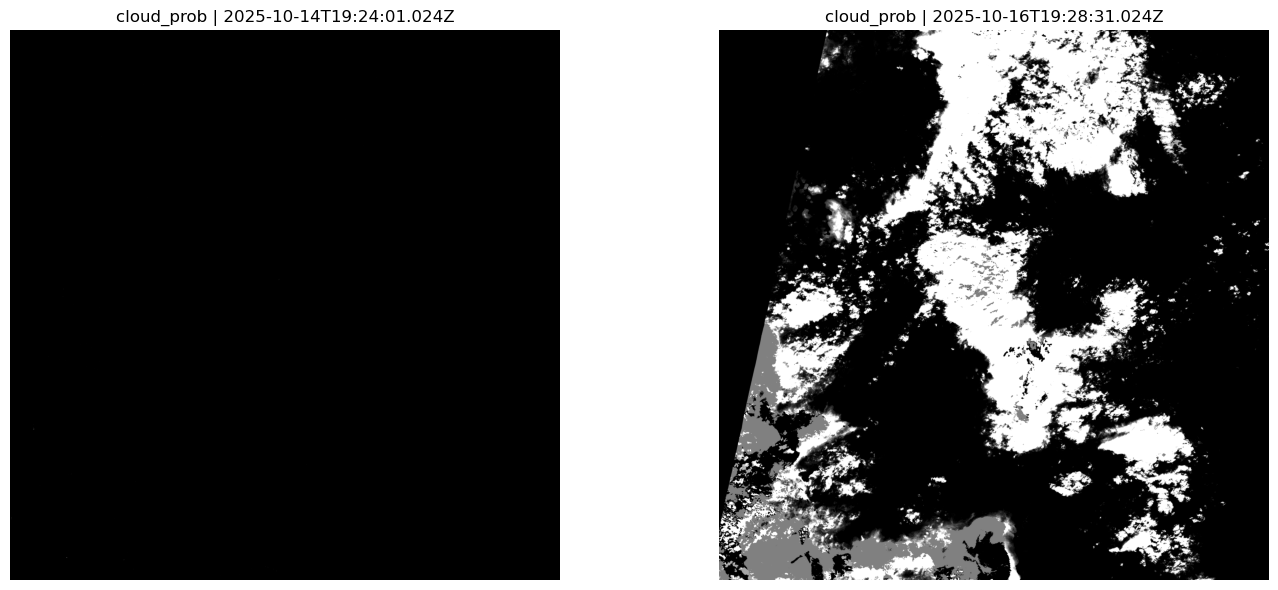

In [105]:
plot_multiple(X_list=[cloud_dat_1, cloud_dat_2], 
              title_list=[f'cloud_prob | {cloud1.meta['acquisition_time']}',
                          f'cloud_prob | {cloud2.meta['acquisition_time']}'],
              max_per_row=2)

In [106]:
for i, b in enumerate(obj1.band_info_list) : 
    print(i + 1, b)

1 B01
2 B02
3 B03
4 B04
5 B05
6 B06
7 B07
8 B8A
9 B09
10 B11
11 B12
12 SCL


**Planning**

Upon the current belief: 
+ Thicker cloud can bend the spectral intensity in a more rigorous way. If that trend is learnable, we can contruct what is underneath the cloud (at least to a lower probability cloud).

Challenges
+ We basically depend on cloud prob provided by Corpenicus, which is not perfect.

+ Cloud probability doesn't mean a certain thickness of cloud, it can be predicted based on various factors, spectral combination and cloud, only swir and cloud, ... We basically do not know (if we did, we would have a perfect classifier.)

Questions

+ Using the 2 rasters. With the cloud mask of the later date, can I reconstruct partially cloud/smoke/... covered area? 

Process

+ 

+ Build a function which let us choose a cloud probability interval, with a band, so that it will give us 2 colours of scatter. 

    -> Red which are cloud covered of the chosen probability, Blue are not cloud covered (All areas with another probability of cloud will be exclusive).

Will we see anything? Will it be learnable? Try construct!

**All the parts with no cloud in both days, will the signal stay the same?**

In [107]:
cloud_mask = cloud_dat_2.astype(np.bool_)

In [163]:
id = 7
dat1_nc = dat1[..., id][~cloud_mask].ravel()
dat2_nc = dat2[..., id][~cloud_mask].ravel()

idx = np.random.choice(np.arange(0, len(dat1_nc)), size=100000, replace = False)

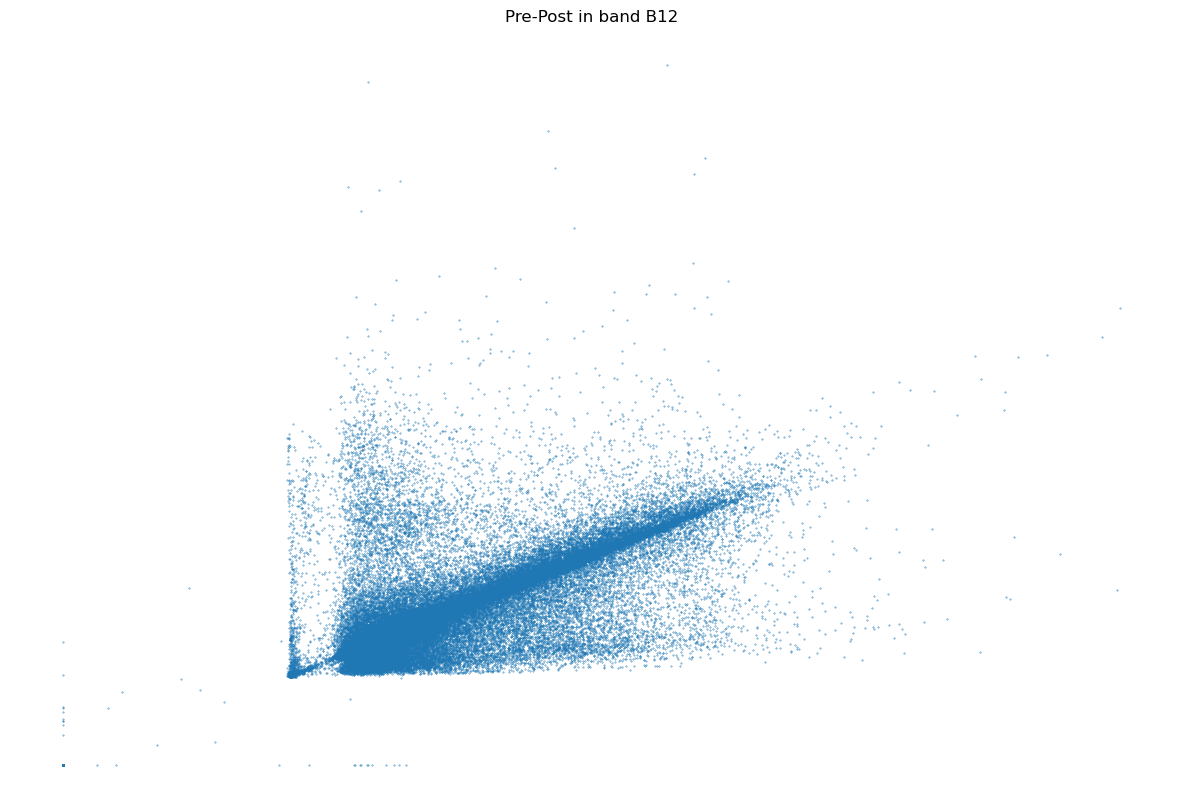

In [161]:
plt.figure(figsize=(15,10))
plt.scatter(dat1_nc[idx], dat2_nc[idx], s = 0.1)
plt.axis('off')
plt.title(f'Pre-Post in band {obj1.band_info_list[id]}')
plt.show()